# Titanic Survival Prediction

## Importing Libraries :-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Processing :-

In [2]:
df = pd.read_csv("/content/titanic_train.csv")

In [3]:
# displaying top 10 entries
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# displaying structure of dataset
df.shape

(891, 12)

In [5]:
# displaing description of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# counting the null vaue column wise
df.isnull().sum(axis=0).sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
# droping the cabin colum because it contains many missing value
df = df.drop("Cabin", axis=1)

In [8]:
# displaying the distinct value of Pclass column
df["Pclass"].unique() 

array([3, 1, 2])

<Axes: ylabel='count'>

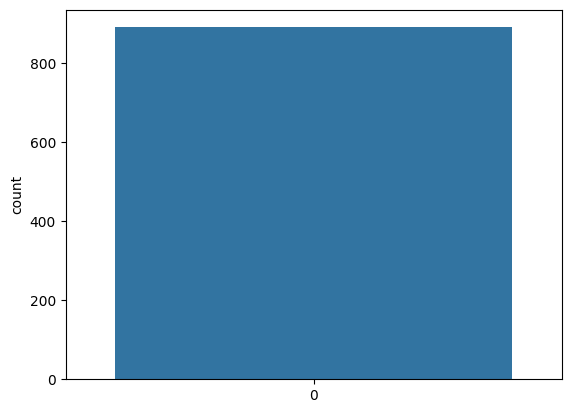

In [9]:
# ploting the bar-graph of Pclass
sns.countplot(df["Pclass"]) 

In [10]:
df["Pclass"].astype("category").value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
df["Age"].mean()

29.69911764705882

In [12]:
df["Pclass"] == 1

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Pclass, Length: 891, dtype: bool

In [13]:
df[df["Pclass"] == 1]["Age"]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

In [14]:
df[df["Pclass"] == 1]["Age"].mean()

38.233440860215055

In [15]:
df[df["Pclass"] == 2]["Age"].mean()

29.87763005780347

In [16]:
df[df["Pclass"] == 3]["Age"].mean()

25.14061971830986

In [17]:
pc1_mean = round(df[df["Pclass"] == 1]["Age"].mean())
pc2_mean = round(df[df["Pclass"] == 2]["Age"].mean())
pc3_mean = round(df[df["Pclass"] == 3]["Age"].mean())

In [18]:
def fill_age(cols):
  age_col = cols[0]
  pclass_col = cols[1]
  
  if pd.isnull(age_col):
    if pclass_col == 1:
      return pc1_mean
    elif pclass_col == 2:
      return pc2_mean
    else:
      return pc2_mean
  else:
    return age_col

In [19]:
df["Age"] = df[["Age", "Pclass"]].apply(fill_age, axis=1)

In [20]:
df.isnull().sum(axis=0).sort_values(ascending=False)

Embarked       2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum(axis=0).sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Exporatory :-

<Axes: ylabel='count'>

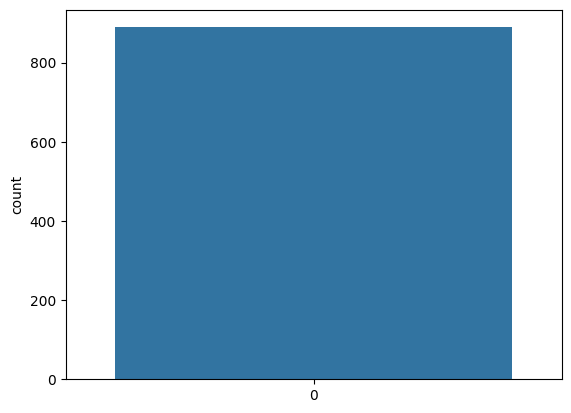

In [23]:
sns.countplot(df["Survived"])

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
df.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 94.8+ KB


In [28]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [29]:
df["Sex"] = df["Sex"].apply(lambda x: 1 if x=="male" else 0)

In [30]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
pd.get_dummies(df["Embarked"], prefix="Emb", drop_first=True)

,Emb_Q,Emb_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [32]:
dummies = pd.get_dummies(df["Embarked"], prefix="emb", drop_first=True)

In [33]:
df = pd.concat([df, dummies], axis=1)

In [34]:
df.drop("Embarked", axis=1, inplace=True)

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,emb_Q,emb_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [36]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [37]:
df["Pclass"].unique()

array([3, 1, 2])

In [38]:
dummies = pd.get_dummies(df["Pclass"], prefix="Pcl", drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop("Pclass", axis=1, inplace=True)

In [39]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,emb_Q,emb_S,Pcl_2,Pcl_3
0,0,1,22.0,1,0,7.2500,0,1,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,1
3,1,0,35.0,1,0,53.1000,0,1,0,0
4,0,1,35.0,0,0,8.0500,0,1,0,1


## Splitting Data :-

In [40]:
X = df.drop("Survived", axis=1) 
y = df["Survived"]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# building traing and tesing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Model Trainng :-

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
# calling our model
nb = GaussianNB()

In [45]:
# traing our model on traing dataset
nb.fit(X_train, y_train) 

GaussianNB()

## Prediction :-

In [46]:
prediction = nb.predict(X_test)

## Model Evaluation :-

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
# Evaluting model using confusion matrix
print(confusion_matrix(y_test, prediction)) 

[[100  15]
 [ 18  45]]


In [49]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       115
           1       0.75      0.71      0.73        63

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



## Data Visualization Plots :-

### HeatMap :

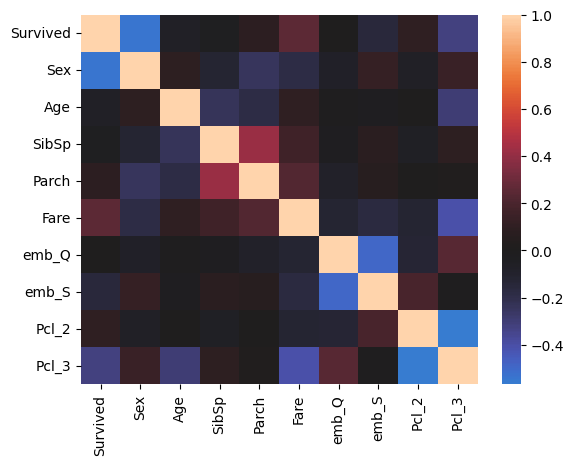

In [50]:
hm = sns.heatmap(data=df.corr(),center=0)

### Box Plot :

<Axes: title={'center': 'Fare'}, xlabel='Survived'>

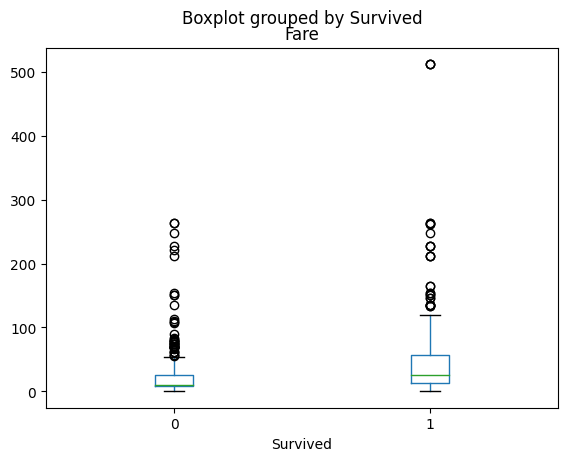

In [51]:
df.boxplot(by='Survived',column=['Fare'],grid=False)

### Density Plot :

<Axes: ylabel='Density'>

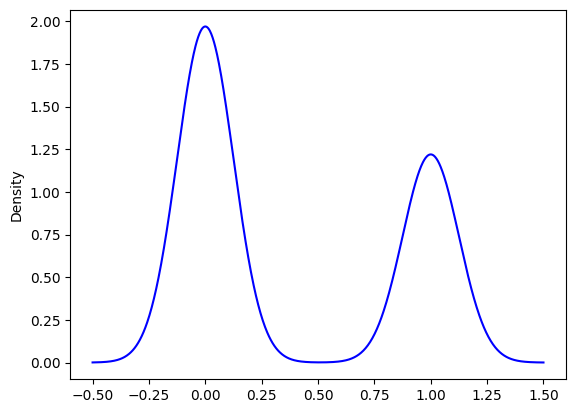

In [52]:
df.Survived.plot.density(color='blue')

### Dist Plot :

<ipython-input-53-6525837c6049>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Survived"])


<Axes: xlabel='Survived', ylabel='Density'>

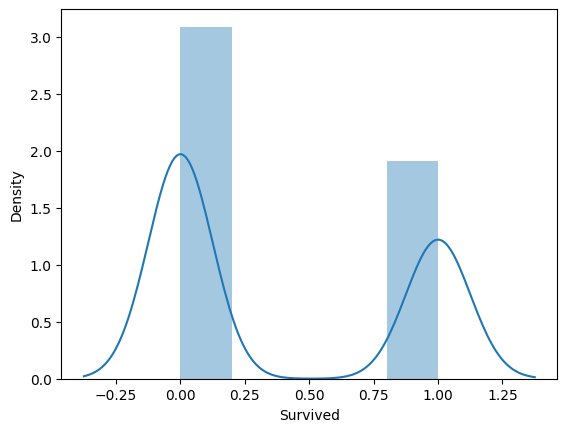

In [53]:
sns.distplot(df["Survived"])

### Joint Plot :

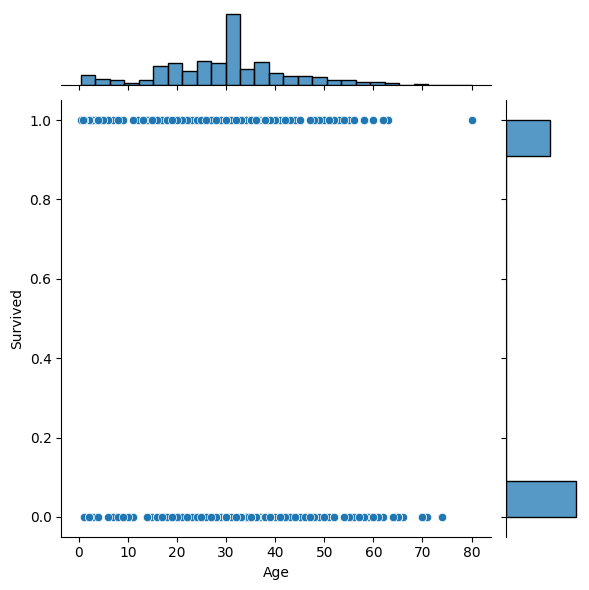

In [54]:
sns.jointplot(data=df, x="Age", y="Survived")

### Vilion Plot :

<Axes: >

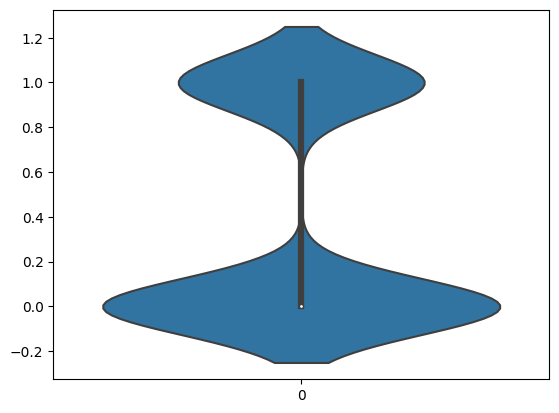

In [55]:
sns.violinplot(df["Survived"])

## Data Visualization :-

### Line Plot :

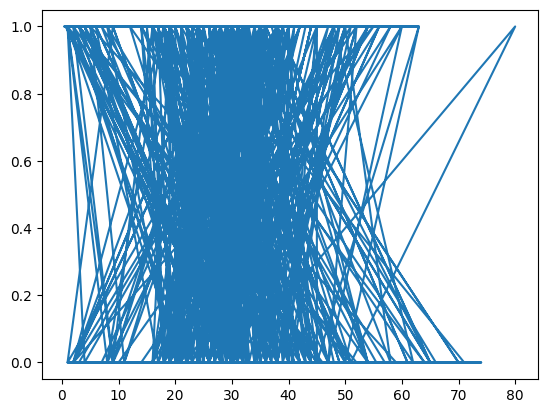

In [56]:
plt.plot(df['Age'],df['Survived'])

### Bar Plot :

<BarContainer object of 889 artists>

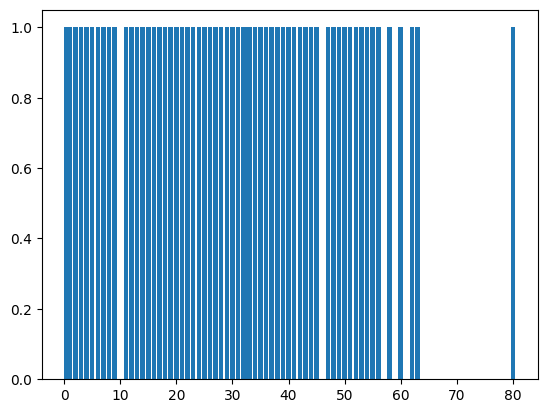

In [57]:
plt.bar(df['Age'],df['Survived'])

### Histogram :

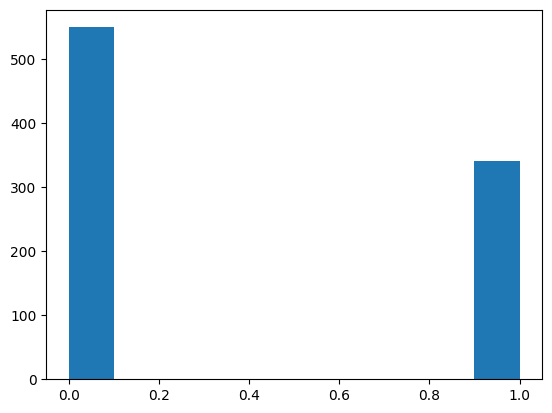

In [58]:
plt.hist(df['Survived'])
plt.show() 

### Pie Chart :

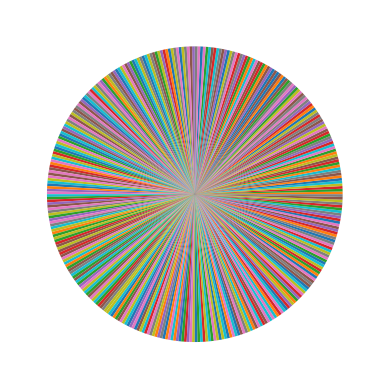

In [59]:
plt.pie(df['Survived'])
plt.show() 